In [2]:
from google.colab import drive
from sklearn import metrics
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import metrics
import seaborn as sns
import re
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import gensim
import string
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
import warnings
from keras import backend as K
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import cross_val_predict




In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:
print(os.listdir("/content/gdrive/MyDrive"))

['Getting started.pdf', 'WP_20170419_100.jpg', 'WP_20170419_098.jpg', 'WP_20170419_099.jpg', 'WP_20170419_101.jpg', 'WP_20170419_103.jpg', 'WP_20170419_102.jpg', 'WP_20170419_104.jpg', 'WP_20170419_107.jpg', 'WP_20170419_106.jpg', 'WP_20170419_109.jpg', 'WP_20170419_113.jpg', 'WP_20170419_110.jpg', 'WP_20170419_114.jpg', 'WP_20170419_117.jpg', 'WP_20170419_115.jpg', 'WP_20170419_118.jpg', 'WP_20170419_121.jpg', 'WP_20170419_127.jpg', 'WP_20170419_128.jpg', 'WP_20170419_131.jpg', 'facerecognition.py', 'AI Introduction.pptx', 'aup6.py', 'aup1.py', 'aup2.py', 'aup3.py', 'amazoncode.py', 'annregression.py', 'Artificial Intelligence.pptx', 'characterrecognition using svm.py', 'digitrecognition using MLP.py', 'edgedetection.py', 'facedetection.py', 'facedetectionbest.py', 'finalselfdrivingcar.py', 'haarcascade_eye.xml', 'haarcascade_frontalface_alt2.xml', 'imageprocessing.py', 'linearregressionmodel.py', 'linearregressiontoday.py', 'linearregressionusingsklearn.py', 'Machine learninig.pptx',

In [6]:
train = pd.read_csv('/content/gdrive/MyDrive/train3.csv')
test = pd.read_csv('/content/gdrive/MyDrive/test3.csv')

# **Data Summarization and Visualization**

In [7]:
print("train data shape: ",train.shape)
print("Test data shape: ",test.shape)

train data shape:  (150150, 9)
Test data shape:  (13860, 8)


In [8]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


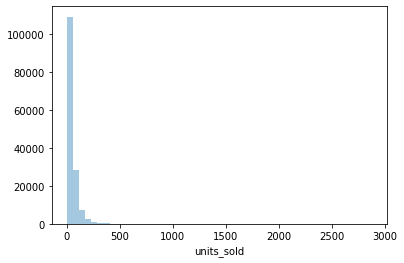

In [9]:
sns.distplot(train['units_sold'],kde = False)
plt.show()

In [10]:
all_data = train.append(test,sort = False)
all_data.shape

(164010, 9)

Text(0, 0.5, 'units_sold')

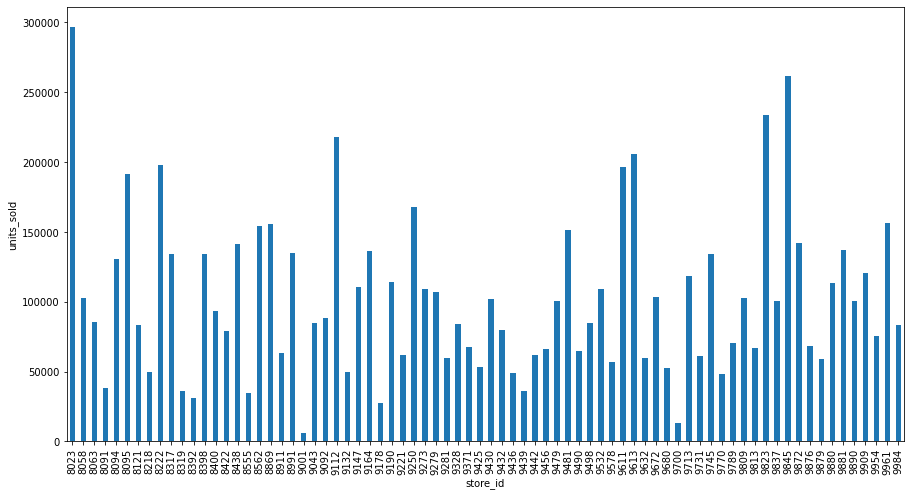

In [11]:
train.groupby('store_id').sum()['units_sold'].plot(figsize=(15,8),kind='bar')
plt.xlabel('store_id')
plt.ylabel('units_sold')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


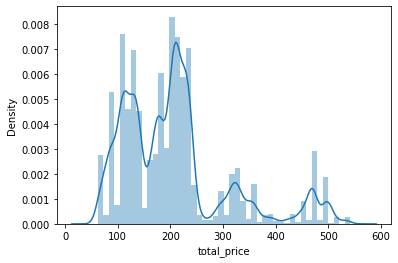

In [12]:
import seaborn as sns
sns.distplot(train['total_price'])

In [85]:
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.628538,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.310494,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


# **Handling Missing Values**

In [13]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [14]:
train[train['total_price'].isna() == True]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


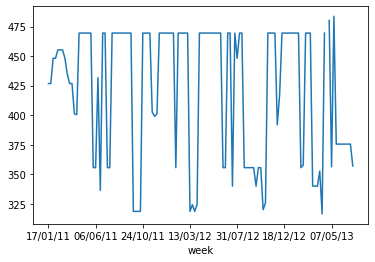

In [15]:
train[(train['store_id']==9436) & (train['sku_id']==245338) ].set_index('week')['total_price'].plot()

In [16]:
train = train.fillna(475)

In [17]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [18]:
all_data.isna().sum()

record_ID              0
week                   0
store_id               0
sku_id                 0
total_price            1
base_price             0
is_featured_sku        0
is_display_sku         0
units_sold         13860
dtype: int64

# **Data Preprocessing**

In [19]:
all_data.tail()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0,NaN
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0,NaN
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1,NaN
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0,NaN
13859,232287,01/10/13,9984,679023,234.4125,234.4125,0,0,NaN


In [20]:
all_data['week'] = pd.to_datetime(all_data['week'])
all_data.dtypes

record_ID                   int64
week               datetime64[ns]
store_id                    int64
sku_id                      int64
total_price               float64
base_price                float64
is_featured_sku             int64
is_display_sku              int64
units_sold                float64
dtype: object

In [21]:
all_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0


In [22]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [23]:
df = train.append(test)

In [24]:
df.shape

(164010, 9)

In [25]:
column=['sku_id','store_id']
name='count_id_sku_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [26]:
column = ['sku_id']
name='count_id_sku'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [27]:
column = ['store_id']
name='count_id_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [28]:
df['price_diff_percent'] = (df['base_price'] - df['total_price']) / df['base_price']

In [29]:
df['Month'] = pd.to_datetime(df['week']).dt.month

df['Day'] = pd.to_datetime(df['week']).dt.day

df['Dayofweek'] = pd.to_datetime(df['week']).dt.dayofweek

df['DayOfyear'] = pd.to_datetime(df['week']).dt.dayofyear

df['Week'] = pd.to_datetime(df['week']).dt.week

df['Quarter'] = pd.to_datetime(df['week']).dt.quarter 

df['Is_month_start'] = pd.to_datetime(df['week']).dt.is_month_start

df['Is_month_end'] = pd.to_datetime(df['week']).dt.is_month_end

df['Is_quarter_start'] = pd.to_datetime(df['week']).dt.is_quarter_start

df['Is_quarter_end'] = pd.to_datetime(df['week']).dt.is_quarter_end

df['Is_year_start'] = pd.to_datetime(df['week']).dt.is_year_start

df['Is_year_end'] = pd.to_datetime(df['week']).dt.is_year_end

df['Is_weekday'] = np.where(df['week'].isin([0,1,2,3,4]),1,0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [30]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_month_start,Is_month_end,Is_quarter_start,Is_quarter_end,Is_year_start,Is_year_end,Is_weekday
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,0.114650,1,17,0,17,3,1,False,False,False,False,False,False,0
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,0.000000,1,17,0,17,3,1,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,01/10/13,9984,223245,241.5375,241.5375,0,0,NaN,142.0,10366.0,2414.0,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0
164006,232282,01/10/13,9984,223153,240.8250,240.8250,0,0,NaN,142.0,8236.0,2414.0,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0
164007,232285,01/10/13,9984,245338,382.6125,401.8500,1,1,NaN,142.0,9088.0,2414.0,0.047872,1,10,3,10,2,1,False,False,False,False,False,False,0
164008,232286,01/10/13,9984,547934,191.6625,191.6625,0,0,NaN,142.0,4402.0,2414.0,0.000000,1,10,3,10,2,1,False,False,False,False,False,False,0


In [31]:

from sklearn.preprocessing import LabelEncoder

In [32]:
df.dtypes

record_ID               int64
week                   object
store_id                int64
sku_id                  int64
total_price           float64
base_price            float64
is_featured_sku         int64
is_display_sku          int64
units_sold            float64
count_id_sku_store    float64
count_id_sku          float64
count_id_store        float64
price_diff_percent    float64
Month                   int64
Day                     int64
Dayofweek               int64
DayOfyear               int64
Week                    int64
Quarter                 int64
Is_month_start           bool
Is_month_end             bool
Is_quarter_start         bool
Is_quarter_end           bool
Is_year_start            bool
Is_year_end              bool
Is_weekday              int64
dtype: object

In [33]:
df.select_dtypes(exclude=["int","float"]).columns

Index(['week', 'Is_month_start', 'Is_month_end', 'Is_quarter_start',
       'Is_quarter_end', 'Is_year_start', 'Is_year_end'],
      dtype='object')

In [34]:
col=['store_id','sku_id','Is_month_start','Is_month_end','Is_quarter_start','Is_quarter_end','Is_year_start','Is_year_end']

In [35]:
for i in col:
    df = pd.get_dummies(df, columns=[i])

In [36]:
df

,record_ID,week,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,1,17/01/11,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,0.114650,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
1,2,17/01/11,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
2,3,17/01/11,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
3,4,17/01/11,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
4,5,17/01/11,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,0.000000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164005,232281,01/10/13,241.5375,241.5375,0,0,NaN,142.0,10366.0,2414.0,0.000000,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
164006,232282,01/10/13,240.8250,240.8250,0,0,NaN,142.0,8236.0,2414.0,0.000000,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
164007,232285,01/10/13,382.6125,401.8500,1,1,NaN,142.0,9088.0,2414.0,0.047872,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
164008,232286,01/10/13,191.6625,191.6625,0,0,NaN,142.0,4402.0,2414.0,0.000000,1,10,3,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1


In [37]:
df.drop(['record_ID','week'],inplace=True,axis=1)

In [38]:
df.head()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
0,99.0375,111.8625,0,0,20.0,142.0,9656.0,1278.0,0.11465,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
1,99.0375,99.0375,0,0,28.0,142.0,9514.0,1278.0,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
2,133.9500,133.9500,0,0,19.0,142.0,9372.0,1278.0,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
3,133.9500,133.9500,0,0,44.0,142.0,10508.0,1278.0,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
4,141.0750,141.0750,0,0,52.0,142.0,9940.0,1278.0,0.00000,1,17,0,17,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


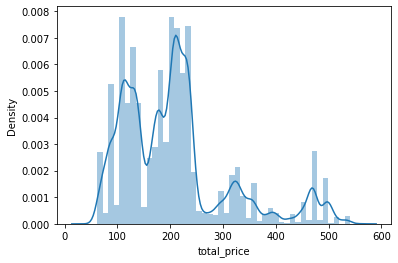

In [39]:
import seaborn as sns
sns.distplot(df['total_price'])

In [40]:
df['total_price']=np.log1p(df['total_price'])
df['base_price']=np.log1p(df['base_price'])
df['units_sold'] = np.log1p(df['units_sold'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


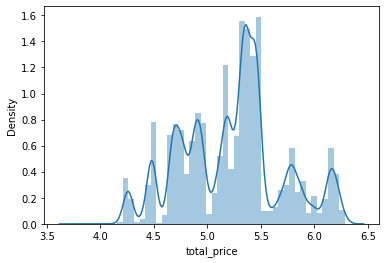

In [41]:
sns.distplot(df['total_price'])

In [42]:
tests = df[df['units_sold'].isna() == True]
trains = df[df['units_sold'].isna() == False]

In [43]:
print(trains.shape,tests.shape)

(150150, 130) (13860, 130)


In [44]:
del tests['units_sold']

In [45]:
trains.corr()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
total_price,1.000000,0.964818,0.055316,-0.095097,-0.307979,NaN,-2.054021e-01,7.443723e-02,-0.086049,0.004914,-0.000544,0.010891,0.004839,0.004810,0.007791,NaN,2.686200e-02,1.722529e-02,1.026563e-02,-2.688166e-02,2.902744e-03,6.420118e-03,3.218706e-02,-1.842909e-02,4.842662e-03,1.296275e-02,1.885809e-02,3.290496e-03,1.368816e-02,3.204540e-03,3.643160e-03,2.404864e-02,-1.542993e-02,1.498783e-02,6.474291e-03,1.430413e-03,1.641154e-02,-1.983564e-02,-1.266398e-02,1.537780e-02,...,1.697112e-03,-2.267000e-02,-2.171788e-01,-3.743690e-01,-3.692773e-01,-2.035300e-01,7.610962e-02,-1.108717e-01,6.395251e-02,3.277007e-02,2.639500e-01,9.182211e-02,2.226258e-02,8.931642e-02,4.881216e-02,4.694938e-02,4.314242e-01,3.503098e-01,-2.863650e-01,-1.109926e-01,3.224729e-02,-5.188575e-02,2.852574e-02,2.241681e-01,3.703848e-02,1.078567e-02,-3.868925e-02,1.445704e-01,5.233599e-02,1.258836e-02,0.001636,-0.001636,-0.011940,0.011940,0.002686,-0.002686,NaN,0.002686,-0.002686,NaN
base_price,0.964818,1.000000,0.194962,0.005290,-0.223743,NaN,-2.046420e-01,7.424288e-02,0.177274,0.001780,-0.001263,0.005652,0.001646,0.001703,0.001878,NaN,2.899273e-02,1.954051e-02,7.107968e-03,-2.715420e-02,4.344814e-03,8.359997e-03,2.847701e-02,-2.050593e-02,7.936349e-03,1.072402e-02,1.788929e-02,8.688417e-03,1.749924e-02,3.381910e-03,2.427099e-03,2.240894e-02,-1.580451e-02,1.609660e-02,1.001098e-02,-6.764410e-04,1.401747e-02,-2.144516e-02,-1.191011e-02,1.311857e-02,...,2.330511e-03,-2.328172e-02,-2.319672e-01,-3.830917e-01,-3.789106e-01,-2.175455e-01,6.471937e-02,-1.115583e-01,5.300460e-02,3.372749e-02,2.566819e-01,8.503562e-02,6.505817e-02,8.298582e-02,5.695879e-02,5.000641e-02,4.514187e-01,3.668756e-01,-2.946814e-01,-8.097853e-02,1.860719e-02,-3.959143e-02,1.599767e-02,2.347954e-01,3.631706e-02,9.803197e-03,-3.960907e-02,1.465378e-01,5.140975e-02,1.215924e-02,0.004799,-0.004799,-0.002761,0.002761,0.003631,-0.003631,NaN,0.003631,-0.003631,NaN
is_featured_sku,0.055316,0.194962,1.000000,0.426243,0.280215,NaN,-1.153827e-02,1.184017e-02,0.546044,0.005281,-0.004591,-0.012028,0.004940,0.005518,-0.005490,NaN,-3.082096e-06,-4.884207e-04,2.464432e-03,-8.207756e-03,9.039988e-04,-2.876296e-03,9.192179e-03,1.163066e-03,-1.596306e-03,5.627401e-03,9.059078e-04,5.307918e-04,2.200388e-03,1.239342e-03,7.448595e-03,6.438498e-03,5.061866e-03,1.329385e-03,-1.331444e-03,7.913454e-03,6.018389e-03,-4.281103e-03,-6.689804e-03,8.874483e-03,...,-2.313395e-03,-5.134509e-03,-4.973929e-02,-4.870565e-02,-4.880984e-02,-4.784526e-02,-1.254527e-02,-3.332293e-02,-1.156146e-02,-5.074378e-03,-1.278425e-02,-1.060627e-02,1.031229e-02,2.459470e-02,6.119668e-02,2.109637e-02,1.478538e-01,1.213682e-01,-4.311099e-02,-9.238074e-03,-3.175755e-02,-4.281103e-03,-2.920342e-02,7.758021e-02,-5.721079e-03,-5.546220e-03,-5.399756e-02,1.604796e-02,-8.094336e-03,-1.129871e-02,-0.019447,0.019447,0.035232,-

In [46]:
X = trains.drop('units_sold',axis = 1)
Y = train['units_sold']

In [47]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [49]:
print(X_train)

        total_price  base_price  ...  Is_year_start_True  Is_year_end_False
142470     5.482304    5.482304  ...                   0                  1
144804     5.835651    5.835651  ...                   0                  1
18084      5.793128    5.793128  ...                   0                  1
92035      6.171883    6.171883  ...                   0                  1
13892      4.899611    4.899611  ...                   0                  1
...             ...         ...  ...                 ...                ...
41993      4.966335    5.122326  ...                   0                  1
97639      5.113793    5.113793  ...                   0                  1
95939      4.899611    4.899611  ...                   0                  1
117952     4.250101    4.451873  ...                   1                  1
43567      5.143343    5.143343  ...                   0                  1

[105105 rows x 129 columns]


In [50]:
print(y_train)

142470     19
144804     31
18084      27
92035      11
13892      41
         ... 
41993     136
97639      17
95939      96
117952     56
43567       2
Name: units_sold, Length: 105105, dtype: int64


In [51]:
X_train.isnull().sum()

total_price              0
base_price               0
is_featured_sku          0
is_display_sku           0
count_id_sku_store       0
                        ..
Is_quarter_start_True    0
Is_quarter_end_False     0
Is_year_start_False      0
Is_year_start_True       0
Is_year_end_False        0
Length: 129, dtype: int64

In [52]:
y_train.isnull().sum()

0

In [53]:
#X_train.drop('units_sold',axis=1)

KeyError: ignored

In [55]:
X_train.isnull().sum()

total_price              0
base_price               0
is_featured_sku          0
is_display_sku           0
count_id_sku_store       0
                        ..
Is_quarter_start_True    0
Is_quarter_end_False     0
Is_year_start_False      0
Is_year_start_True       0
Is_year_end_False        0
Length: 129, dtype: int64

In [56]:
X_train.dtypes

total_price              float64
base_price               float64
is_featured_sku            int64
is_display_sku             int64
count_id_sku_store       float64
                          ...   
Is_quarter_start_True      uint8
Is_quarter_end_False       uint8
Is_year_start_False        uint8
Is_year_start_True         uint8
Is_year_end_False          uint8
Length: 129, dtype: object

In [57]:
X_train.head()

,total_price,base_price,is_featured_sku,is_display_sku,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,store_id_9112,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
142470,5.482304,5.482304,0,0,142.0,9798.0,1420.0,0.0,5,28,1,148,22,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
144804,5.835651,5.835651,0,0,142.0,10366.0,2556.0,0.0,11,6,2,310,45,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
18084,5.793128,5.793128,0,0,142.0,10366.0,1420.0,0.0,2,5,5,36,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
92035,6.171883,6.171883,0,0,142.0,2556.0,2698.0,0.0,7,24,1,206,30,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
13892,4.899611,4.899611,0,0,142.0,10508.0,3408.0,0.0,11,4,4,308,44,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1


In [58]:
len(X_train)

105105

In [59]:
X_test.head()

,total_price,base_price,is_featured_sku,is_display_sku,count_id_sku_store,count_id_sku,count_id_store,price_diff_percent,Month,Day,Dayofweek,DayOfyear,Week,Quarter,Is_weekday,store_id_8023,store_id_8058,store_id_8063,store_id_8091,store_id_8094,store_id_8095,store_id_8121,store_id_8218,store_id_8222,store_id_8317,store_id_8319,store_id_8392,store_id_8398,store_id_8400,store_id_8422,store_id_8438,store_id_8555,store_id_8562,store_id_8869,store_id_8911,store_id_8991,store_id_9001,store_id_9043,store_id_9092,store_id_9112,...,store_id_9961,store_id_9984,sku_id_216233,sku_id_216418,sku_id_216419,sku_id_216425,sku_id_217217,sku_id_217390,sku_id_217777,sku_id_219009,sku_id_219029,sku_id_219844,sku_id_222087,sku_id_222765,sku_id_223153,sku_id_223245,sku_id_245338,sku_id_245387,sku_id_300021,sku_id_300291,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023,Is_month_start_False,Is_month_start_True,Is_month_end_False,Is_month_end_True,Is_quarter_start_False,Is_quarter_start_True,Is_quarter_end_False,Is_year_start_False,Is_year_start_True,Is_year_end_False
53093,5.989682,6.153876,1,1,142.0,6106.0,2414.0,0.151745,11,28,0,332,48,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
87814,5.455268,5.455268,0,0,142.0,3692.0,3408.0,0.000000,3,7,2,67,10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
74568,4.418087,4.418087,0,0,142.0,9656.0,1704.0,0.000000,10,4,3,278,40,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
80444,4.956355,5.402114,1,0,142.0,8236.0,2698.0,0.361290,5,15,1,136,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1
149843,4.713464,4.713464,0,0,142.0,6390.0,2272.0,0.000000,9,7,5,250,36,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1


In [60]:
y_train.head()

142470    19
144804    31
18084     27
92035     11
13892     41
Name: units_sold, dtype: int64

In [61]:
y_test.head()

53093      17
87814      16
74568      20
80444     297
149843     38
Name: units_sold, dtype: int64

# **Linear Regression**

In [62]:
#linear regression
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)
predict1 = model1.predict(X_test)

In [63]:
predict1

array([ 66.38574219,  19.46469116,  57.87741089, ...,  72.60687256,
        78.70367432, -26.47445679])

In [64]:
len(predict1)

45045

In [65]:
 from sklearn.metrics import mean_squared_error
 err=mean_squared_error(predict1,y_test)
 print(err)

1726.2868907707618


In [91]:
model1.coef_

array([-3.93961009e+02,  3.65778002e+02,  3.98150863e+01,  3.40120619e+01,
       -1.74370544e+09,  5.08564142e+01, -8.94918915e+01, -3.51016513e+02,
       -3.49835003e+01, -1.32693780e+00, -1.24650565e+00,  1.90942434e+00,
       -5.13587988e+00, -1.95394772e+00,  3.34877299e+05,  2.49279917e+05,
        1.72963559e+05,  2.23783688e+05,  9.66872042e+04,  2.87334349e+05,
        2.11121018e+05,  2.11077332e+05,  1.47519482e+05,  2.11128622e+05,
        2.36513669e+05,  1.09400351e+05,  1.22102119e+05,  1.98388754e+05,
        1.60253646e+05,  1.60245584e+05,  2.49216893e+05,  1.09385373e+05,
        2.11104084e+05,  1.85691951e+05,  1.72941525e+05,  2.74630375e+05,
        7.72413035e+03,  1.72954658e+05,  2.23784015e+05,  2.11134327e+05,
        1.09405121e+05,  1.60265986e+05,  2.11097371e+05,  5.85686321e+04,
        2.11092022e+05,  1.60236084e+05,  2.11107741e+05,  2.23791086e+05,
        2.36492204e+05,  1.60233901e+05,  2.23781964e+05,  1.34821174e+05,
        1.60230301e+05,  

In [92]:
model1.intercept_

247607091714.48108

In [67]:
print('linear regression value:')
model1.score(X_train, y_train)

linear regression value:


0.4984062577483676

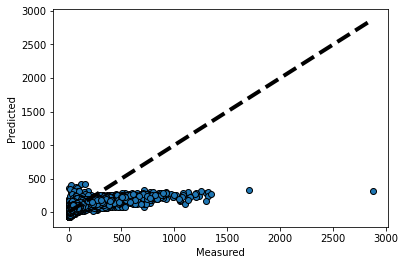

In [93]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
model=linear_model.LinearRegression()
predicted = cross_val_predict(model,X_train,y_train,cv=10)
fig,ax=plt.subplots()
ax.scatter(y_train,predicted,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
results = []
results.append(predicted)
names.append(name)
msg =  '%f (%f)' % ( predicted.mean(), predicted.std())
print(msg)

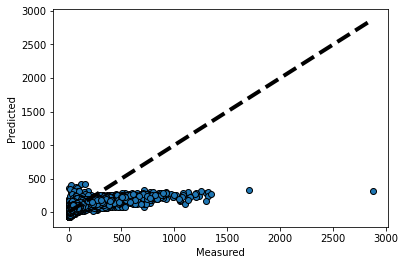

51.524166 (42.399803)


In [95]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
model=linear_model.LinearRegression()
predicted = cross_val_predict(model,X_train,y_train,cv=10)
fig,ax=plt.subplots()
ax.scatter(y_train,predicted,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
results = []

results.append(predicted)
msg =  '%f (%f)' % ( predicted.mean(), predicted.std())
print(msg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


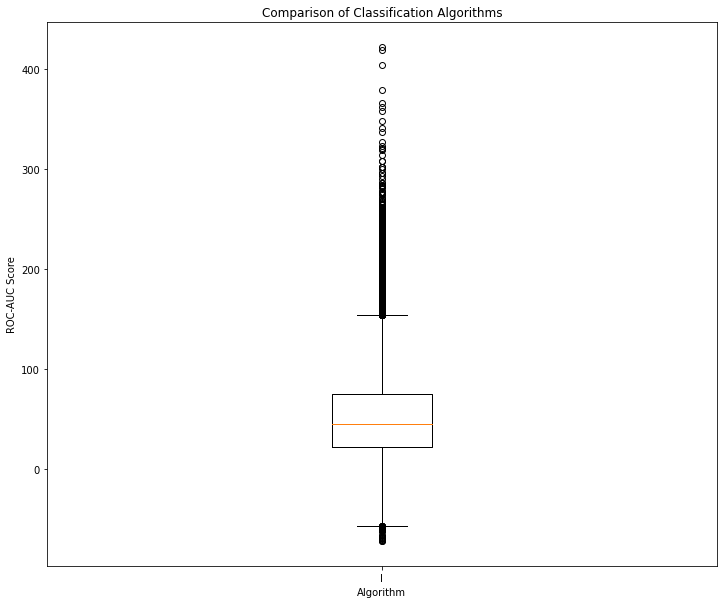

In [96]:

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels('linear')
plt.show()

# **Decision** **Tree**

In [69]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [70]:
#try
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
max_depth = [3, 5, 7]
min_samples = [10, 100, 1000]
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for d in max_depth:
    for samp in min_samples:
        xticks.append("Depth- " + str(d) + ' Min Samples leaf-' + str(samp))
        print("Depth- " + str(d) + ' Min Samples leaf-' + str(samp) + " :")
        
        model = DecisionTreeRegressor(max_depth=d, min_samples_leaf=samp)
        predicted = cross_val_predict(model,X_train,y_train,cv=10)
        
        
        err = mean_squared_error(y_train, predicted) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

Depth- 3 Min Samples leaf-10 :
Mean Squared Error on train set:  2406.492913573937
**************************************************
Depth- 3 Min Samples leaf-100 :
Mean Squared Error on train set:  2406.492913573937
**************************************************
Depth- 3 Min Samples leaf-1000 :
Mean Squared Error on train set:  2455.262628980238
**************************************************
Depth- 5 Min Samples leaf-10 :
Mean Squared Error on train set:  1872.6323715746246
**************************************************
Depth- 5 Min Samples leaf-100 :
Mean Squared Error on train set:  1933.1503374187762
**************************************************
Depth- 5 Min Samples leaf-1000 :
Mean Squared Error on train set:  2232.9670422794143
**************************************************
Depth- 7 Min Samples leaf-10 :
Mean Squared Error on train set:  1530.6546870011875
**************************************************
Depth- 7 Min Samples leaf-100 :
Mean Squared Error o

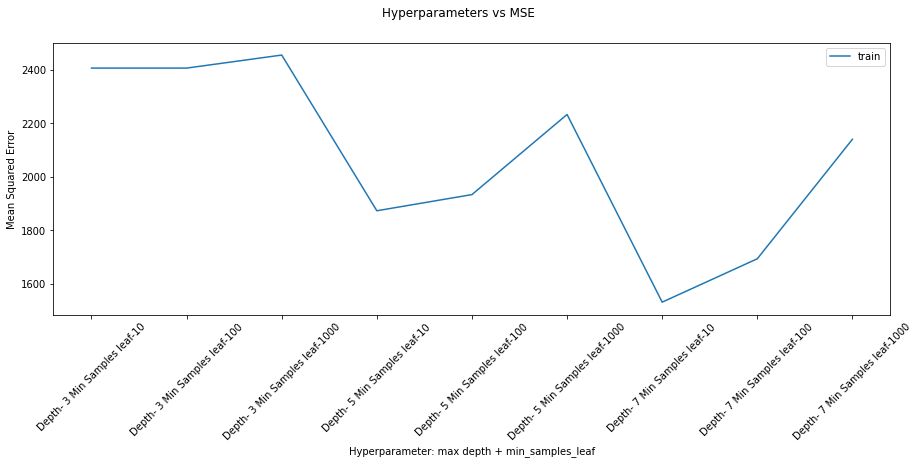

In [71]:
plt.figure(figsize=(15,5))
plt.suptitle("Hyperparameters vs MSE")
plt.plot(range(len(max_depth) * len(min_samples)), tr_errors)
plt.legend(['train'])
plt.xticks(range(len(max_depth) * len(min_samples)), xticks, rotation=45)
plt.xlabel('Hyperparameter: max depth + min_samples_leaf')
plt.ylabel('Mean Squared Error')
plt.show()

In [72]:
model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=10)
predicted = cross_val_predict(model,X_train,y_train,cv=10)

In [73]:
from sklearn.metrics import r2_score
print(f'the decision tree value  :{r2_score(y_train,predicted)}')

the decision tree value  :0.5828444360059482


## **KNN**

In [98]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(19):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 51.039676247489574
RMSE value for k=  2 is: 43.88309534748041
RMSE value for k=  3 is: 43.43695726762243
RMSE value for k=  4 is: 43.221217774577056
RMSE value for k=  5 is: 43.91939694378132
RMSE value for k=  6 is: 44.83767504306064
RMSE value for k=  7 is: 45.45333528124599
RMSE value for k=  8 is: 46.131910683116715
RMSE value for k=  9 is: 46.75159110257513
RMSE value for k=  10 is: 47.52538376732062
RMSE value for k=  11 is: 48.22083813725295
RMSE value for k=  12 is: 48.8378245611366
RMSE value for k=  13 is: 49.349805265651426
RMSE value for k=  14 is: 49.57868020973742
RMSE value for k=  15 is: 49.85697860194012
RMSE value for k=  16 is: 50.12212920942635
RMSE value for k=  17 is: 50.36535369279845
RMSE value for k=  18 is: 50.37880110300738
RMSE value for k=  19 is: 50.573558300107614


In [99]:
#from sklearn.model_selection import KFold
#kf = KFold(n_splits=5, random_state=42)
#X = np.array(equalized_X)
#y = np.array(equalized_y)
#knn_final_index=[]
#knn_final_score=[]
#for index in range(1, 117, 2):
#  score=[]
#  knn = KNeighborsClassifier(n_neighbors = index)
#for train_index, test_index in kf.split(X):
 #     X_train, X_test = X[train_index], X[test_index] 
  #    y_train, y_test = y[train_index], y[test_index]
   #   X_train, X_test, y_train, y_test = train_test_split(X,y)
#      knn.fit(X_train,y_train)
#      score.append(knn.score(X_test,y_test))
#  knn_final_score.append(sum(score)/len(score))
#  knn_final_index.append(index)
#plt.scatter(knn_final_index, knn_final_score)
#plt.xlabel('K value')
#plt.ylabel('Prediction')
#plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NameError: ignored

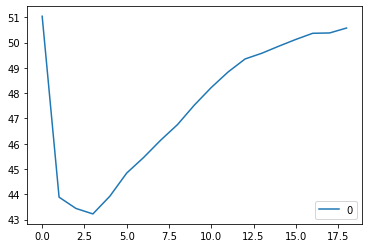

In [100]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## **Unsupervised Algorithms**

In [80]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def best_SVC(X,y):
    svc_model = SVC()
    param_dic = {'C':[1,10,100],
                'gamma':[0.001,0.005,0.01]}
    clf = GridSearchCV(svc_model, param_dic, n_jobs=-1)
    clf.fit(X, y)
    print("Best: ", clf.best_params_)
    return clf.best_estimator_

In [81]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

def benchmark(X,y):

    pca = PCA(n_components = 24)
    pca.fit(X_train)
    reduced_X_train, reduced_X_test = pca.transform(X_train), pca.transform(X_test)

    best_model = best_SVC(reduced_X_train,y_train)
    predictions = best_model.predict(reduced_X_test)
    return accuracy_score(y_test, predictions)

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# K-means with K-fold

kf = KFold(n_splits=5, random_state=42)
X = np.array(X)
y = np.array(Y)
kmeans_final_score=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    kmeans=KMeans(n_clusters=2,random_state=4,algorithm="elkan",max_iter=1000,n_jobs=-1)
    kmeans.fit(X_train)
    prediction=kmeans.predict(X_test)
    kmeans_final_score.append(accuracy_score(y_test,prediction))
print('Prediction Score',sum(kmeans_final_score)/len(kmeans_final_score), sep=': ')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Prediction Score: 0.0015184612925568757


In [88]:
from sklearn.neighbors import LocalOutlierFactor
# Local Outliner Factor
clf_lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', metric='minkowski', leaf_size=30, p=2)
y_pred = clf_lof.fit_predict(X)
LOF_Scores = clf_lof.negative_outlier_factor_
print('Prediction Score',accuracy_score(y,y_pred),sep=': ')

Prediction Score: 0.0027172827172827173
